In [78]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

data = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [79]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
data['cbwd']=data['cbwd'].factorize()[0]

In [5]:
data['pm2.5'] = data['pm2.5'].fillna(method='ffill').fillna(method='bfill')

In [6]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,129.0,-21,-11.0,1021.0,0,1.79,0,0
1,2,2010,1,1,1,129.0,-21,-12.0,1020.0,0,4.92,0,0
2,3,2010,1,1,2,129.0,-21,-11.0,1019.0,0,6.71,0,0
3,4,2010,1,1,3,129.0,-21,-14.0,1019.0,0,9.84,0,0
4,5,2010,1,1,4,129.0,-20,-12.0,1018.0,0,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,0,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,0,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,0,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,0,246.72,0,0


In [7]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,97.801114,1.817246,12.448521,1016.447654,1.488933,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,91.376429,14.433440,12.198613,10.268698,1.262327,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,0.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,1.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,136.000000,15.000000,23.000000,1025.000000,3.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,3.000000,585.600000,27.000000,36.000000


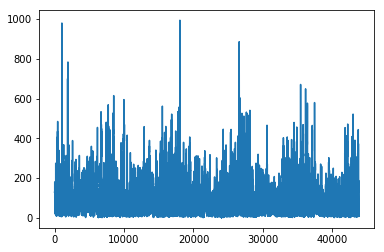

In [8]:
plt.plot(data['pm2.5'])

In [9]:
from sklearn.preprocessing import MinMaxScaler
values = data[data.columns[5:]].values.reshape(-1,8)
values = values.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [10]:
values

array([[129.  , -21.  , -11.  , ...,   1.79,   0.  ,   0.  ],
       [129.  , -21.  , -12.  , ...,   4.92,   0.  ,   0.  ],
       [129.  , -21.  , -11.  , ...,   6.71,   0.  ,   0.  ],
       ...,
       [ 10.  , -22.  ,  -3.  , ..., 242.7 ,   0.  ,   0.  ],
       [  8.  , -22.  ,  -4.  , ..., 246.72,   0.  ,   0.  ],
       [ 12.  , -21.  ,  -3.  , ..., 249.85,   0.  ,   0.  ]],
      dtype=float32)

In [11]:
scaled

array([[0.15561694, 0.0174954 , 0.0267035 , ..., 0.03848067, 0.03683241,
        0.03683241],
       [0.15561694, 0.0174954 , 0.02578269, ..., 0.0413628 , 0.03683241,
        0.03683241],
       [0.15561694, 0.0174954 , 0.0267035 , ..., 0.04301105, 0.03683241,
        0.03683241],
       ...,
       [0.04604052, 0.01657459, 0.03406998, ..., 0.2603131 , 0.03683241,
        0.03683241],
       [0.0441989 , 0.01657459, 0.03314917, ..., 0.26401472, 0.03683241,
        0.03683241],
       [0.04788214, 0.0174954 , 0.03406998, ..., 0.26689687, 0.03683241,
        0.03683241]], dtype=float32)

In [26]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)-9

test_size = len(scaled) - train_size-val_size
train,val, test,test1 = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:],scaled[train_size:,]
print(len(train),len(val), len(test))

35059 4373 4392


In [27]:
data[train_size+val_size:]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
39432,39433,2014,7,2,0,27.0,20,21.0,1005.0,1,1.78,0,6
39433,39434,2014,7,2,1,30.0,20,21.0,1004.0,1,2.67,0,7
39434,39435,2014,7,2,2,34.0,20,21.0,1004.0,2,1.79,0,0
39435,39436,2014,7,2,3,43.0,20,21.0,1004.0,2,2.68,0,0
39436,39437,2014,7,2,4,45.0,20,21.0,1003.0,1,0.89,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,0,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,0,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,0,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,0,246.72,0,0


In [28]:
def create_dataset_multistep(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-predict):
        a = dataset[i:(i + look_back)]
        #a = dataset[0:((i+1)*look_back)]

        dataX.append(a)
        dataY.append(dataset[i+ look_back-1: i+ look_back+predict-1, 0])
        #dataY.append(dataset[(i+1)*look_back-1: (i+1)*look_back-1, 0])

    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [29]:
look_back = 168
predict=24
trainX, trainY = create_dataset_multistep(train, look_back,predict)
valX, valY = create_dataset_multistep(val, look_back,predict)
testX, testY = create_dataset_multistep(test, look_back,predict)

34867
4181
4200


In [16]:

34867/168

207.54166666666666

In [285]:
testY[900]

array([0.08471455, 0.06721915, 0.08287293, ..., 0.09484346, 0.08839779,
       0.09300184], dtype=float32)

In [137]:
print(trainX.shape)
print(trainY.shape)

(34867, 168, 8)
(34867, 24)


(<Figure size 1152x144 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8e7b47e2e8>)

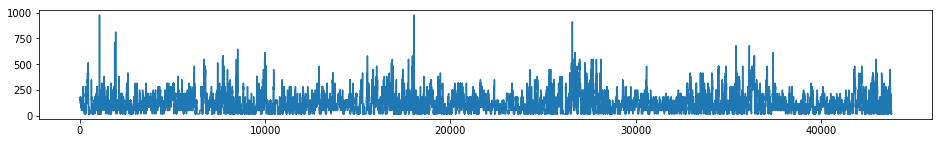

In [172]:
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse
from tsaug.visualization import plot

my_augmenter = (Quantize(n_levels=[30]))
X_aug1= my_augmenter.augment(data['pm2.5'].values)
plot(X_aug1)

In [173]:
#quant=scaler.fit_transform(X_aug1.reshape(-1,1))
quant = (X_aug1-(np.min(X_aug1)))/(np.max(X_aug1)-(np.min(X_aug1)))
quant=quant.reshape(-1,1)
quant

array([[0.13793103],
       [0.13793103],
       [0.13793103],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [174]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train_q,val_q, test_q = quant[0:train_size,:],quant[train_size:train_size+val_size,:], quant[train_size+val_size:,:]
print(len(train_q),len(val_q), len(test_q))

35059 4382 4383


In [175]:
def create_dataset_multistep_uni(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-predict):
        a = dataset[i:(i + look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+ look_back-1: i+ look_back+predict-1, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [176]:
look_back = 168
predict=24
trainX_q, trainY_q = create_dataset_multistep_uni(train_q, look_back,predict)
valX_q, valY_q = create_dataset_multistep_uni(val_q, look_back,predict)
testX_q, testY_q = create_dataset_multistep_uni(test_q, look_back,predict)

34867
4190
4191


In [177]:
testY[900]

array([0.06169429, 0.05893186, 0.0626151 , 0.06721915, 0.08747698,
       0.10128913, 0.10220995, 0.11786372, 0.11233886, 0.08471455,
       0.07918969, 0.06721915, 0.07090239, 0.08195212, 0.10220995,
       0.09944751, 0.08103131, 0.07734807, 0.0718232 , 0.0626151 ,
       0.08471455, 0.09484346, 0.08839779, 0.09300184], dtype=float32)

In [178]:
look_back = 168
predict=24 
trainX_o, trainY_o = create_dataset_multistep_uni(train, look_back,predict)
valX_o, valY_o = create_dataset_multistep_uni(val, look_back,predict)
testX_o, testY_o = create_dataset_multistep_uni(test, look_back,predict)

34867
4190
4191


In [179]:
trainX_q.shape

(34867, 168)

In [180]:
trainX_q = np.reshape(trainX_q, (trainX_q.shape[0], trainX_q.shape[1], 1))
valX_q = np.reshape(valX_q, (valX_q.shape[0], valX_q.shape[1],1))
testX_q = np.reshape(testX_q, (testX_q.shape[0],testX_q.shape[1], 1 ))

In [181]:
trainX_o = np.reshape(trainX_o, (trainX_o.shape[0], trainX_o.shape[1], 1))
valX_o = np.reshape(valX_o, (valX_o.shape[0], valX_o.shape[1],1))
testX_o = np.reshape(testX_o, (testX_o.shape[0],testX_o.shape[1], 1 ))

In [182]:
print(trainX.shape)
print(trainX_q.shape)

(34867, 168, 8)
(34867, 168, 1)


In [183]:
print(valX.shape)
print(valX_q.shape)

(4190, 168, 8)
(4190, 168, 1)


# new

In [ ]:
first_input = Input(shape=(168,8))


in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=add([in0,in1])

in0=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same', name='extractor')(in1)
in1=add([in0,in1])

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1=Flatten()(in1)
in1=Dropout(0.5)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/pm2.5_reslstmcnn_multi.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [61]:
hist = model.fit([trainX],trainY, epochs = 30,validation_data=([valX],valY),batch_size=100, verbose = 1,callbacks=[cb])

Train on 34867 samples, validate on 4181 samples
Epoch 1/30
34800/34867 [============================>.] - ETA: 0s - loss: 0.0043
Epoch 00003: val_loss improved from 0.00465 to 0.00426, saving model to saved_weights/pm2.5_reslstmcnn_multi.hdf5
34800/34867 [============================>.] - ETA: 0s - loss: 0.0041
Epoch 00004: val_loss did not improve from 0.00426
34867/34867 [==============================] - 30s 871us/sample - loss: 0.0041 - val_loss: 0.0043
Epoch 5/30
34300/34867 [============================>.] - ETA: 0s - loss: 0.0040
Epoch 00005: val_loss did not improve from 0.00426
34867/34867 [==============================] - 30s 871us/sample - loss: 0.0040 - val_loss: 0.0043
Epoch 6/30
34700/34867 [============================>.] - ETA: 0s - loss: 0.0039
Epoch 00006: val_loss did not improve from 0.00426
34867/34867 [==============================] - 30s 872us/sample - loss: 0.0039 - val_loss: 0.0044
Epoch 7/30
34800/34867 [============================>.] - ETA: 0s - loss: 0.0

KeyboardInterrupt: 

In [18]:
model.load_weights('saved_weights/pm2.5_lstmcnn_multi1.hdf5')

In [672]:
model.load_weights('saved_weights/pm2.5_reslstmcnn_multi2.hdf5')

In [32]:
# test 길이 수정해서 하는거
model.load_weights('saved_weights/pm2.5_lstmcnn_multi.hdf5')

In [62]:
# test 길이 수정해서 하는거
model.load_weights('saved_weights/pm2.5_reslstmcnn_multi.hdf5')

In [668]:
class CharacterTable(object):
    def __init__(self, chars):
        """Initialize character table.
        # Arguments
            chars: Characters that can appear in the input.
        """
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))

    def encode(self, C, num_rows):
        """One hot encode given string C.
        # Arguments
            num_rows: Number of rows in the returned one hot encoding. This is
                used to keep the # of rows for each data the same.
        """
        x = np.zeros((num_rows, len(self.chars)))
        for i, c in enumerate(C):
            x[i, self.char_indices[c]] = 1
        return x

    def decode(self, x, calc_argmax=True):
        if calc_argmax:
            x = x.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in x)

In [680]:
model.layers

(1, 168, 64)


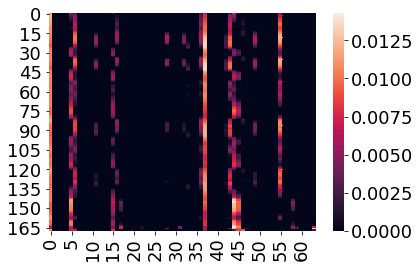

lstm_43/kernel:0 (8, 256)
[[-0.  0. -0. ...  0.  0. -0.]
 [-0. -0. -0. ...  0.  0.  0.]
 [ 0. -0.  0. ... -0.  0. -0.]
 ...
 [-0.  0.  0. ... -0. -0.  0.]
 [-0. -0.  0. ...  0.  0. -0.]
 [-0.  0. -0. ... -0. -0. -0.]]
lstm_43/recurrent_kernel:0 (64, 256)
[[-0.  0.  0. ...  0.  0.  0.]
 [-0.  0.  0. ... -0. -0. -0.]
 [ 0.  0. -0. ...  0. -0. -0.]
 ...
 [ 0. -0. -0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. -0.]
 [-0. -0.  0. ... -0.  0. -0.]]
lstm_43/bias:0 (256,)
[-0.  0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0. -0. -0.  0.
  0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0.  0.  0.  0. -0.  0.
 -0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.
 -0. -0.  0. -0.  0.  0.  0. -0. -0. -0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -0.  0.  0.

In [686]:
from tensorflow.keras.models import Model

chars = '0123456789+ '
ctable = CharacterTable(chars)
i = 1
output_final = model.predict(np.array([testX[i]]))

#print(ctable.decode(valX[i]),
 #     ctable.decode(valY[i]),
  #    ctable.decode(output_final[0]))

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[7].output)
output = intermediate_layer_model.predict(np.array([testX[i]]))
print(output.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# h = np.reshape(output[0], (-1, 8))
# sns.heatmap(h)
sns.heatmap(output[0])
plt.show()

# %% Print weights.
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(weight)

(1, 168, 64)


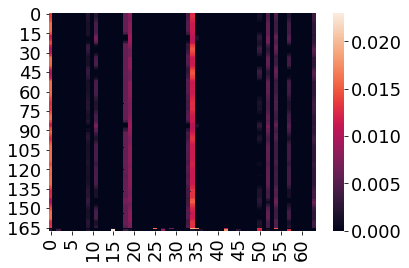

lstm_40/kernel:0 (8, 256)
[[-0. -0.  0. ...  0.  0. -0.]
 [-0. -0. -0. ... -0.  0. -0.]
 [-0.  0. -0. ... -0.  0. -0.]
 ...
 [-0. -0. -0. ... -0. -0.  0.]
 [-0.  0.  0. ...  0. -0. -0.]
 [ 0.  0. -0. ...  0.  0. -0.]]
lstm_40/recurrent_kernel:0 (64, 256)
[[-0. -0. -0. ... -0.  0.  0.]
 [-0.  0. -0. ... -0.  0.  0.]
 [ 0. -0.  0. ...  0. -0.  0.]
 ...
 [ 0. -0. -0. ... -0.  0.  0.]
 [ 0. -0. -0. ... -0. -0.  0.]
 [ 0.  0. -0. ...  0.  0.  0.]]
lstm_40/bias:0 (256,)
[-0. -0.  0.  0.  0. -0.  0. -0. -0.  0.  0.  0.  0. -0.  0. -0.  0. -0.
 -0.  0.  0. -0. -0. -0. -0.  1. -0. -0.  0. -0. -0. -0. -0.  0.  0.  0.
 -0. -0.  0. -0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0. -0.  0.
 -0.  0. -0.  0.  0.  0.  0. -0. -0. -0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -0.  0. -0.

In [676]:
from tensorflow.keras.models import Model

chars = '0123456789+ '
ctable = CharacterTable(chars)
i = 1
output_final = model.predict(np.array([testX[i]]))

#print(ctable.decode(valX[i]),
 #     ctable.decode(valY[i]),
  #    ctable.decode(output_final[0]))

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[7].output)
output = intermediate_layer_model.predict(np.array([testX[i]]))
print(output.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# h = np.reshape(output[0], (-1, 8))
# sns.heatmap(h)
sns.heatmap(output[0])
plt.show()

# %% Print weights.
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(weight)

In [479]:
from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k+15]
    testy=testY[24*k+15]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)


print(np.mean(non_aug_rm))
print(np.mean(non_aug_ma))

Test MAE: 0.01283
Test RMSE: 0.01668
Test MAE: 0.01748
Test RMSE: 0.02032
Test MAE: 0.01521
Test RMSE: 0.01847
Test MAE: 0.00969
Test RMSE: 0.01115
Test MAE: 0.06931
Test RMSE: 0.07707
Test MAE: 0.03065
Test RMSE: 0.03349
Test MAE: 0.01533
Test RMSE: 0.01930
Test MAE: 0.02727
Test RMSE: 0.03303
Test MAE: 0.01686
Test RMSE: 0.01878
Test MAE: 0.00851
Test RMSE: 0.01174
Test MAE: 0.04455
Test RMSE: 0.05515
Test MAE: 0.02275
Test RMSE: 0.02656
Test MAE: 0.01913
Test RMSE: 0.02080
Test MAE: 0.02958
Test RMSE: 0.03630
Test MAE: 0.01645
Test RMSE: 0.02489
0.028249240346754485
0.023706436


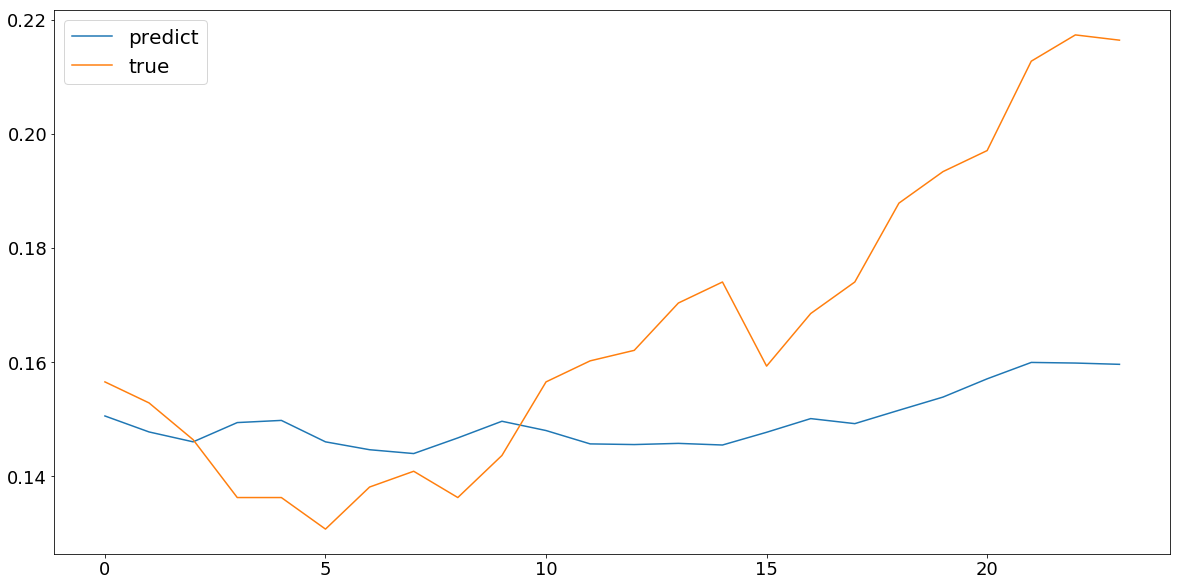

Test RMSE: 0.02715
Test MAE: 0.02124
Test MSE: 0.00074
Test RMSE: 29.48939
Test MAE: 23.06312


In [594]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*thu[15]+15]
testy=testY[24*thu[15]+15]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))-abs(np.min(values))
testY_inverse=testy*(np.max(values)-np.min(values))-abs(np.min(values))
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


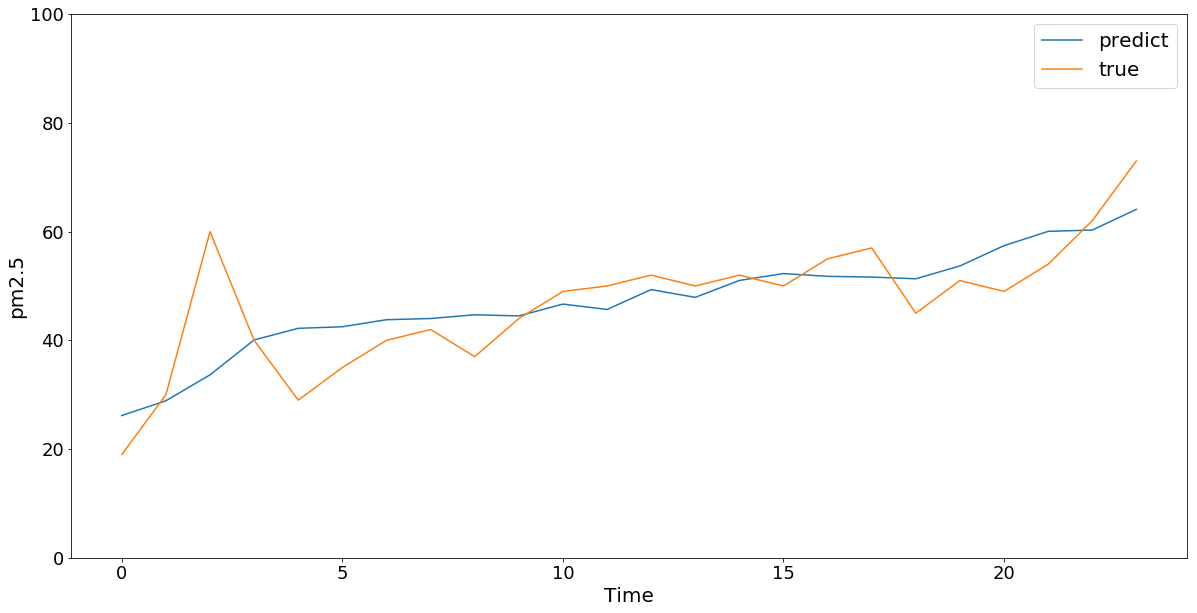

In [579]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
plt.ylim(0,100)
plt.xlabel('Time')
plt.ylabel('pm2.5')
pyplot.show()

In [21]:
aug_rm=[]
aug_ma=[]
rm1=[]
ma1=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k+15]
        testy=testY[24*k+15]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm1.append(np.mean(aug_rm))
    ma1.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

NameError: name 'mon' is not defined

In [491]:
#saved_weights/pm2.5_lstmcnn_multi.hdf5
aug_rm=[]
aug_ma=[]
rm1=[]
ma1=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k+15]
        testy=testY[24*k+15]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm1.append(np.mean(aug_rm))
    ma1.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.02210
Test RMSE: 0.02532
Test MAE: 0.03290
Test RMSE: 0.03814
Test MAE: 0.01620
Test RMSE: 0.01966
Test MAE: 0.03959
Test RMSE: 0.04776
Test MAE: 0.05621
Test RMSE: 0.05986
Test MAE: 0.02590
Test RMSE: 0.03030
Test MAE: 0.03304
Test RMSE: 0.03557
Test MAE: 0.03020
Test RMSE: 0.03870
Test MAE: 0.10774
Test RMSE: 0.11159
Test MAE: 0.03599
Test RMSE: 0.03884
Test MAE: 0.02968
Test RMSE: 0.03417
Test MAE: 0.03894
Test RMSE: 0.04697
Test MAE: 0.02093
Test RMSE: 0.02346
Test MAE: 0.02289
Test RMSE: 0.02527
Test MAE: 0.06724
Test RMSE: 0.08489
Test MAE: 0.01724
Test RMSE: 0.01924
Test MAE: 0.01142
Test RMSE: 0.01324
Test MAE: 0.03142
Test RMSE: 0.03760
Test MAE: 0.00738
Test RMSE: 0.00857
Test MAE: 0.07567
Test RMSE: 0.08516
Test MAE: 0.01848
Test RMSE: 0.02612
Test MAE: 0.04823
Test RMSE: 0.06750
Test MAE: 0.09941
Test RMSE: 0.10457
Test MAE: 0.02864
Test RMSE: 0.03553
Test MAE: 0.06731
Test RMSE: 0.07419
0.0452889469051639
0.039390262
Test MAE: 0.00948
Test RMSE: 0.01192
Test MA

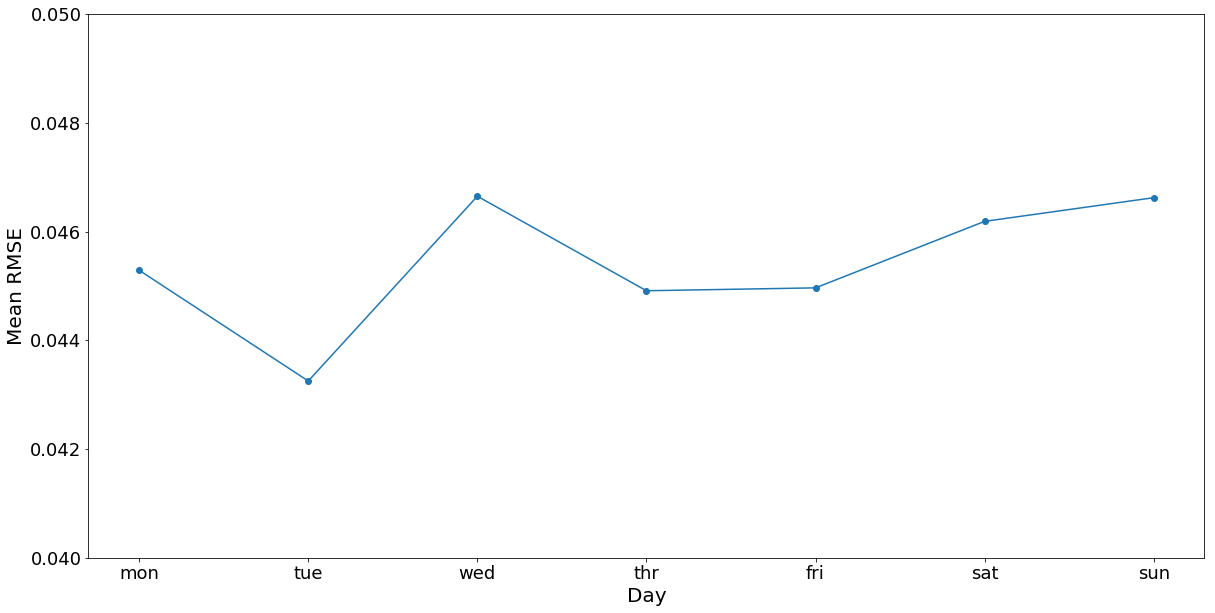

In [496]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, rm1, marker='o', label='lstm-cnn')
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
#plt.ylim(0.032,0.04)
plt.ylim(0.040,0.05)

pyplot.show()

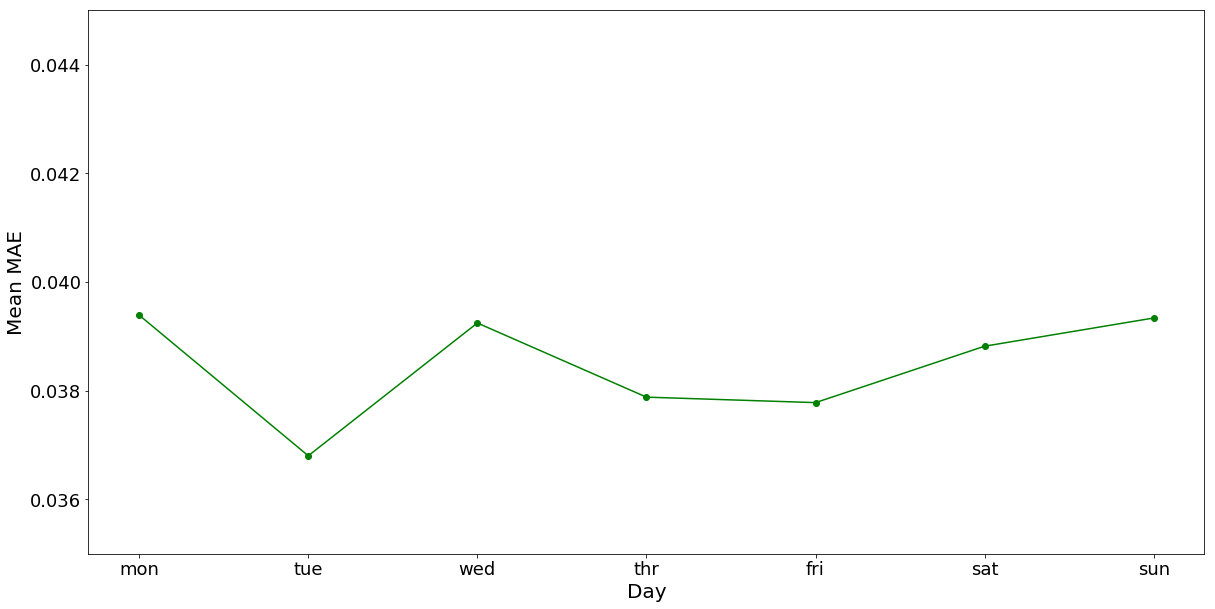

In [518]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, ma1,'g', marker='o', label='lstm-cnn')
plt.ylabel('Mean MAE')
plt.xlabel('Day')
plt.ylim(0.035,0.045)

pyplot.show()

In [63]:

aug_rm=[]
aug_ma=[]
rm=[]
ma=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k]
        testy=testY[24*k]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm.append(np.mean(aug_rm))
    ma.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.02234
Test RMSE: 0.02463
Test MAE: 0.01258
Test RMSE: 0.01452
Test MAE: 0.01492
Test RMSE: 0.01874
Test MAE: 0.03430
Test RMSE: 0.04019
Test MAE: 0.01806
Test RMSE: 0.01985
Test MAE: 0.05180
Test RMSE: 0.05557
Test MAE: 0.03708
Test RMSE: 0.04167
Test MAE: 0.01891
Test RMSE: 0.02273
Test MAE: 0.02361
Test RMSE: 0.03085
Test MAE: 0.03531
Test RMSE: 0.04430
Test MAE: 0.06154
Test RMSE: 0.06807
Test MAE: 0.01606
Test RMSE: 0.02002
Test MAE: 0.04159
Test RMSE: 0.05037
Test MAE: 0.01256
Test RMSE: 0.01653
Test MAE: 0.06390
Test RMSE: 0.08112
Test MAE: 0.14225
Test RMSE: 0.15827
Test MAE: 0.03358
Test RMSE: 0.03475
Test MAE: 0.03197
Test RMSE: 0.03746
Test MAE: 0.09621
Test RMSE: 0.11121
Test MAE: 0.02172
Test RMSE: 0.02762
Test MAE: 0.07981
Test RMSE: 0.09008
Test MAE: 0.04614
Test RMSE: 0.06174
Test MAE: 0.03037
Test RMSE: 0.04051
Test MAE: 0.01037
Test RMSE: 0.01248
Test MAE: 0.07748
Test RMSE: 0.08975
0.04852125680376633
0.041378465
Test MAE: 0.02552
Test RMSE: 0.02833
Test M

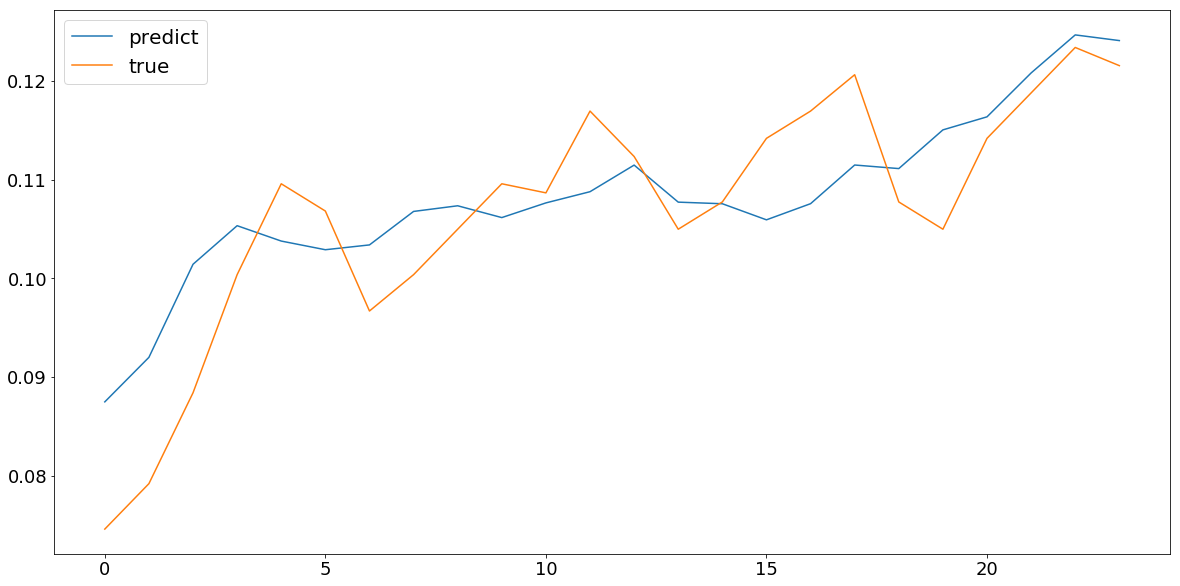

Test RMSE: 0.00684
Test MAE: 0.00556
Test MSE: 0.00005
Test RMSE: 7.42608
Test MAE: 6.04241


In [ ]:
from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*sun[-8]]
testy=testY[24*sun[-8]]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))-abs(np.min(values))
testY_inverse=testy*(np.max(values)-np.min(values))-abs(np.min(values))
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


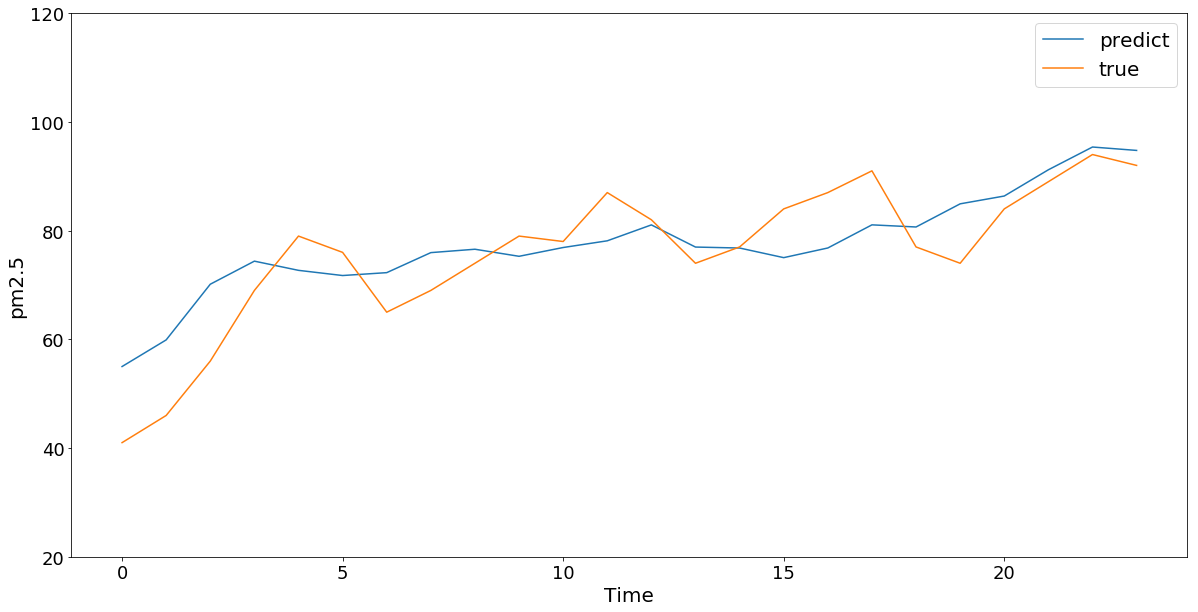

In [77]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
plt.ylim(20,120)
plt.xlabel('Time')
plt.ylabel('pm2.5')
pyplot.show()

In [599]:
aug_rm=[]
aug_ma=[]
rm=[]
ma=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k+15]
        testy=testY[24*k+15]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm.append(np.mean(aug_rm))
    ma.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.03150
Test RMSE: 0.03454
Test MAE: 0.03455
Test RMSE: 0.04030
Test MAE: 0.01777
Test RMSE: 0.02212
Test MAE: 0.04682
Test RMSE: 0.05728
Test MAE: 0.05600
Test RMSE: 0.06012
Test MAE: 0.02694
Test RMSE: 0.03214
Test MAE: 0.04373
Test RMSE: 0.04593
Test MAE: 0.02823
Test RMSE: 0.03720
Test MAE: 0.10822
Test RMSE: 0.11251
Test MAE: 0.04539
Test RMSE: 0.04892
Test MAE: 0.02797
Test RMSE: 0.03227
Test MAE: 0.04015
Test RMSE: 0.05103
Test MAE: 0.02933
Test RMSE: 0.03177
Test MAE: 0.02609
Test RMSE: 0.02718
Test MAE: 0.07042
Test RMSE: 0.08681
Test MAE: 0.01466
Test RMSE: 0.01614
Test MAE: 0.01450
Test RMSE: 0.01710
Test MAE: 0.03623
Test RMSE: 0.04210
Test MAE: 0.01053
Test RMSE: 0.01305
Test MAE: 0.07817
Test RMSE: 0.08714
Test MAE: 0.01708
Test RMSE: 0.02397
Test MAE: 0.05245
Test RMSE: 0.06923
Test MAE: 0.09837
Test RMSE: 0.10291
Test MAE: 0.02620
Test RMSE: 0.03268
Test MAE: 0.06378
Test RMSE: 0.07157
0.047840821379545886
0.04180476
Test MAE: 0.00623
Test RMSE: 0.00795
Test M

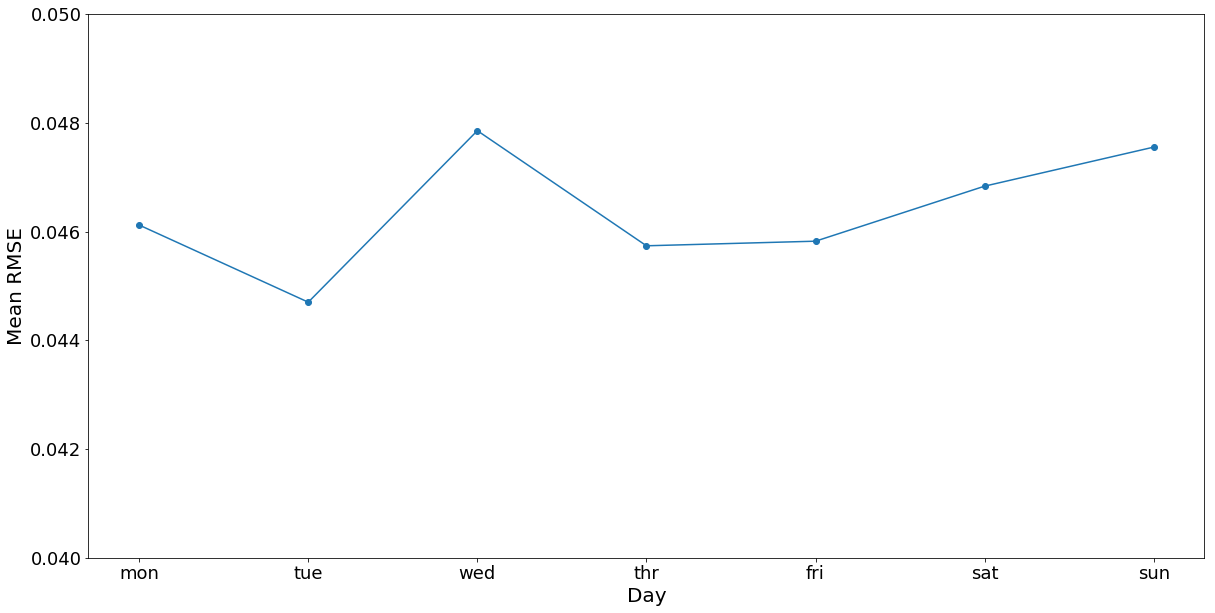

In [517]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, rm, marker='o', label='lstm-cnn')
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
plt.ylim(0.04,0.05)

pyplot.show()

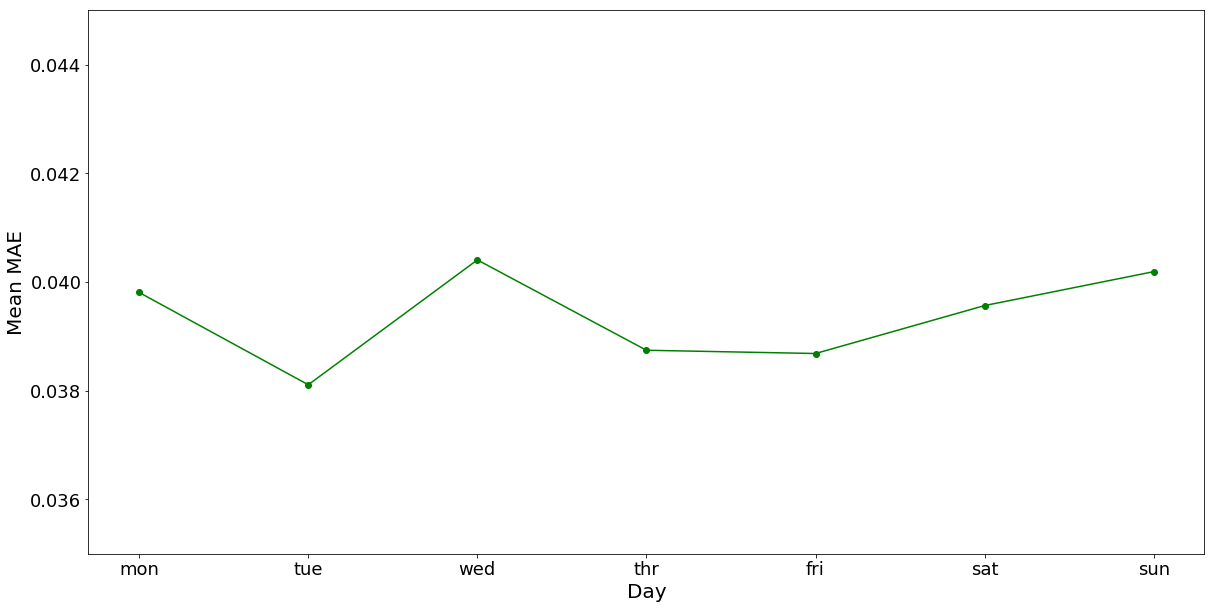

In [519]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, ma,'g', marker='o', label='lstm-cnn')
plt.ylabel('Mean MAE')
plt.xlabel('Day')
plt.ylim(0.035,0.045)

pyplot.show()

In [521]:

aug_rm=[]
aug_ma=[]
rm2=[]
ma2=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k+15]
        testy=testY[24*k+15]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm2.append(np.mean(aug_rm))
    ma2.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.03065
Test RMSE: 0.03349
Test MAE: 0.03766
Test RMSE: 0.04448
Test MAE: 0.02050
Test RMSE: 0.02393
Test MAE: 0.04850
Test RMSE: 0.05986
Test MAE: 0.05693
Test RMSE: 0.06100
Test MAE: 0.03001
Test RMSE: 0.03501
Test MAE: 0.04126
Test RMSE: 0.04320
Test MAE: 0.02589
Test RMSE: 0.03470
Test MAE: 0.11776
Test RMSE: 0.12142
Test MAE: 0.04042
Test RMSE: 0.04428
Test MAE: 0.03039
Test RMSE: 0.03399
Test MAE: 0.03731
Test RMSE: 0.04777
Test MAE: 0.01965
Test RMSE: 0.02213
Test MAE: 0.01491
Test RMSE: 0.01670
Test MAE: 0.06819
Test RMSE: 0.08462
Test MAE: 0.01076
Test RMSE: 0.01311
Test MAE: 0.01809
Test RMSE: 0.02057
Test MAE: 0.02826
Test RMSE: 0.03259
Test MAE: 0.01365
Test RMSE: 0.01782
Test MAE: 0.08210
Test RMSE: 0.09743
Test MAE: 0.04472
Test RMSE: 0.04500
Test MAE: 0.06004
Test RMSE: 0.08311
Test MAE: 0.10632
Test RMSE: 0.11315
Test MAE: 0.04455
Test RMSE: 0.05515
Test MAE: 0.09633
Test RMSE: 0.10912
0.051745778452577246
0.044994365
Test MAE: 0.00567
Test RMSE: 0.00774
Test 

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, rm2, marker='o', label='lstm-cnn')
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
plt.ylim(0.045,0.055)

pyplot.show()

In [ ]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, ma2,'g', marker='o', label='lstm-cnn')
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
plt.ylim(0.045,0.055)

pyplot.show()

In [19]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

In [20]:
columns=data.columns[5:]
X_test=testX.copy()
id_=24*tue[4]+15
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

NameError: name 'tue' is not defined

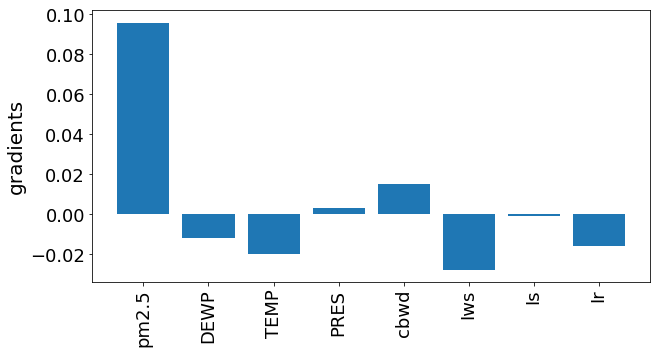

In [607]:
columns=data.columns[5:]
X_test=testX.copy()
id_=24*tue[4]+15
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

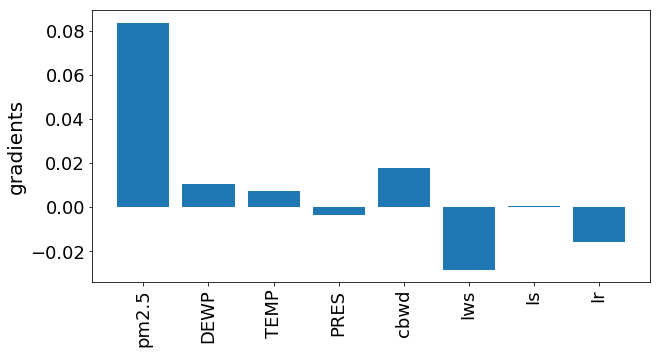

In [569]:
##res
columns=data.columns[5:]
X_test=testX.copy()
id_=24*tue[4]+15
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [608]:
testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([  6.,  14.,  13.,  10.,   8.,   9.,  11.,  14.,  16.,  14.,  25.,
        25.,  31.,  27.,  26.,  28.,  32.,  51.,  32.,  25.,  23.,  27.,
        28.,  26.,  32.,  34.,  48.,  49.,  60.,  63.,  62.,  68.,  63.,
        50.,  23.,  16.,   8.,   6.,   3.,   2.,   5.,   4.,   8.,  15.,
        25.,  28.,  46.,  71., 125., 142., 105., 101.,  89.,  93.,  85.,
        62.,  40.,  52.,  62.,  55.,  48.,  41.,  39.,  43.,  43.,  44.,
        37.,  40.,  64.,  48.,  56.,  41.,  48.,  29.,  40.,  42.,  47.,
        51.,  69.,  79.,  90.,  83.,  76.,  85.,  72.,  56.,  45.,  46.,
        39.,  49.,  49.,  62.,  59.,  58.,  59.,  60.,  72.,  71.,  90.,
       120., 123., 132., 144., 154., 160., 124.,  95.,  80.,  72.,  70.,
        58.,  53.,  54.,  44.,  33.,  46.,  42.,  55.,  15.,  18.,  17.,
        22.,  22.,  24.,  21.,  28.,  31.,  31.,  24.,  25.,  39.,  38.,
        37.,  36.,  32.,  30.,  23.,  20.,  28.,  43.,  53.,  49.,  53.,
        78.,  86.,  65.,  58.,  53.,  26.,  20.,  1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


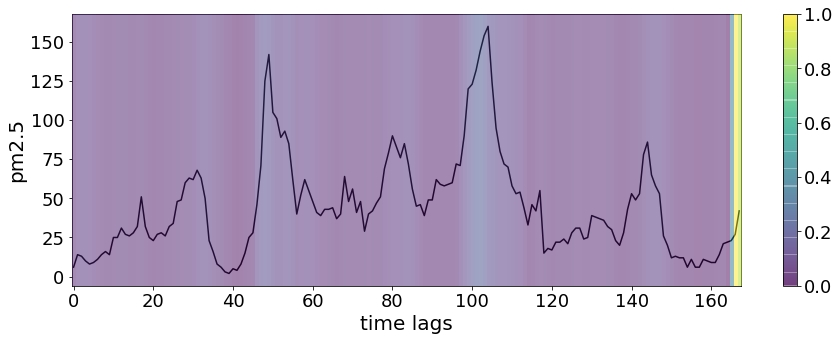

In [609]:
from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('pm2.5'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*100), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

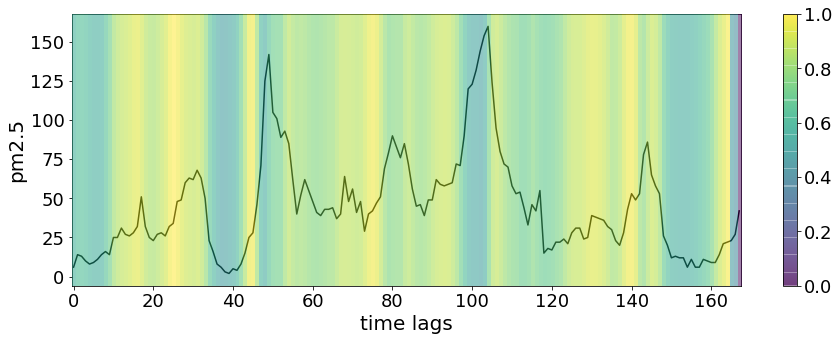

In [576]:
##res
from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler



#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)

#scaler = StandardScaler(feature_range=(0, 1))
#activation=activation.reshape(-1,1)
#activation=scaler.fit_transform(activation)
#activation=activation.reshape(-1)

print(activation)

plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('pm2.5'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*100), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

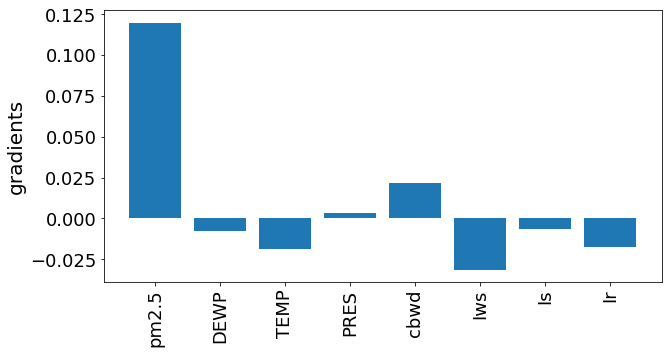

In [661]:
columns=data.columns[5:]
X_test=testX.copy()
id_=24*wed[6]+15
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

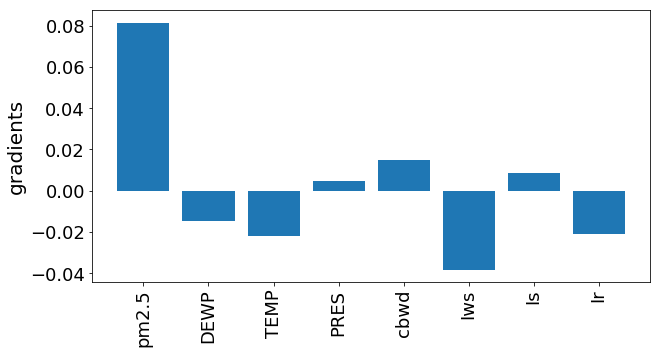

In [656]:
#res
columns=data.columns[5:]
X_test=testX.copy()
id_=24*wed[6]+15
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [662]:
testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([ 73.,  71.,  68.,  88.,  99., 104., 106., 115., 112., 114., 107.,
        99.,  81.,  69.,  69.,  77.,  77.,  77.,  77.,  77.,  77.,  77.,
        77.,  77.,  77.,  99., 112., 119., 122., 133., 133., 140., 153.,
       173., 169., 163., 138., 141., 137., 134., 123., 113., 115., 123.,
       145.,  69.,  19.,  26.,  22.,  23.,  21.,  23.,  18.,  24.,  30.,
        19.,  23.,  19.,  22.,  31.,  42.,  41.,  56.,  72.,  76.,  87.,
        91.,  97., 110., 124., 123., 110., 115., 120., 149., 142., 142.,
       128., 120., 138., 134., 153., 133., 134., 116., 106.,  87.,  83.,
       108.,  95., 104., 118., 133., 151., 171.,  35.,  26.,  20.,  25.,
        31.,  35.,  39.,  45.,  29.,   3.,   6.,   7.,   5.,   4.,   8.,
         6.,  10.,   7.,   6.,   7.,  12.,  17.,  46.,  44.,  38.,  25.,
        16.,  27.,  24.,  27.,  19.,  15.,  16.,  17.,  17.,  10.,   7.,
         7.,   9.,   7.,   9.,   6.,   6.,   8.,  11.,  18.,  21.,  30.,
        26.,  26.,  41.,  35.,  39.,  40.,  23.,  2

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


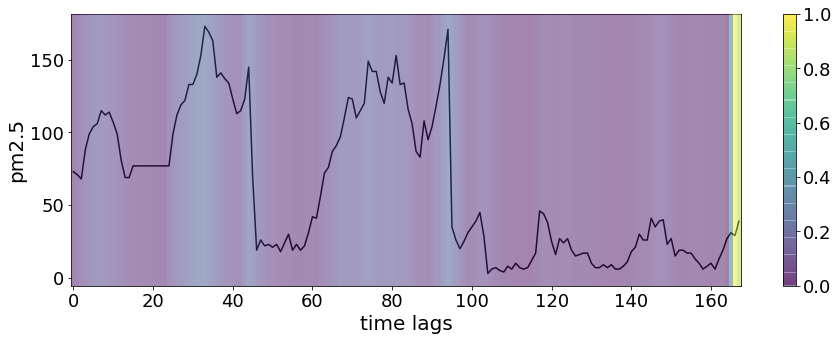

In [663]:
from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('pm2.5'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*100), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]


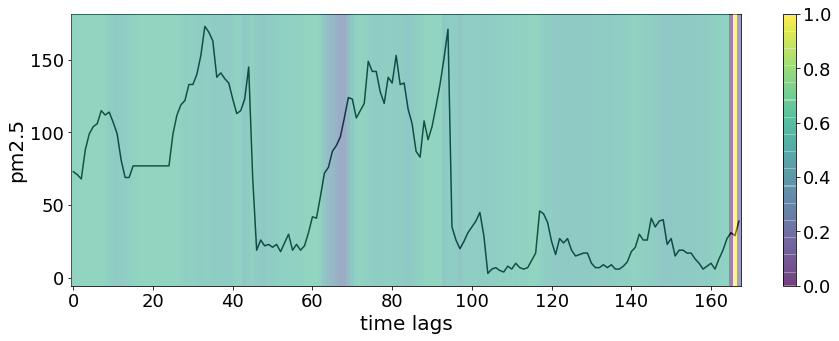

In [658]:
##res

from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)

scaler = MinMaxScaler(feature_range=(0, 1))
activation=activation.reshape(-1,1)
activation=scaler.fit_transform(activation)
activation=activation.reshape(-1)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('pm2.5'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*100), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

In [565]:
scaler = MinMaxScaler(feature_range=(0, 1))
activation=activation.reshape(-1,1)
activation=scaler.fit_transform(activation)

In [567]:
activation.reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## ----

In [184]:
first_input = Input(shape=(168,1))
in1=layers.Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(6, 1))(first_input)
#in1=layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(6, 1))(in1)
in2=layers.Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(6, 1))(in1)
#in3=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in2)
in4=layers.MaxPooling1D(pool_size=2)(in2)
in5=layers.Flatten()(in4)
in5=Dropout(0.5)(in5)
in6=layers.Dense(10)(in5)
#in6=layers.Dense(1)(in6)
#in6=layers.Bidirectional(LSTM(50))(first_input)

inputs = Input(shape=(168, 8), name='inputs')
#lstm_out = Bidirectional(LSTM(80, return_sequences=False))(inputs)
lstm_out = LSTM(80,recurrent_dropout=0.3,return_sequences=False)(inputs)


#lstm_out = LSTM(64, return_sequences=True)(lstm_out)

    # Attention layer
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([lstm_out, lstm_out])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([lstm_out, attn_out])
#flat_out = Flatten()(concat_out)

    # Dense layer
#dense_out = Dense(6, activation='relu')(flat_out)
concat=layers.Concatenate()([in6, lstm_out])
#dens=layers.Dense(100,activation='relu')(concat)
#dens=layers.Dense(100)
#dens= SeqSelfAttention(attention_activation='relu')(concat)

dens=layers.Dense(24)(concat)

model=tf.keras.Model(inputs=[first_input,inputs],outputs=[dens])
model.compile(optimizer='adam', loss='mse')


In [333]:
model.summary()

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 168, 8)]     0                                            
__________________________________________________________________________________________________
lstm_14 (LSTM)                  (None, 168, 64)      18688       input_15[0][0]                   
__________________________________________________________________________________________________
conv1d_34 (Conv1D)              (None, 168, 64)      12352       lstm_14[0][0]                    
__________________________________________________________________________________________________
conv1d_35 (Conv1D)              (None, 168, 64)      12352       conv1d_34[0][0]                  
___________________________________________________________________________________________

In [186]:
checkpoint_path = "saved_weights/multi_pm2.5_multistep_80_aug1.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [376]:
first_input = Input(shape=(168,8))


in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad=add([in0,in1],name='extractor')

#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(ad)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad1=add([ad,in1],name='extractor1')


#in0=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(ad1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([ad1,in1],name='extractor2')
#in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1])

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1=Flatten()(ad1)
in1=Dropout(0.5)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/pm2.5_1dcnn_multi_exp_add1.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "model_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 168, 8)]     0                                            
__________________________________________________________________________________________________
lstm_23 (LSTM)                  (None, 168, 64)      18688       input_24[0][0]                   
__________________________________________________________________________________________________
conv1d_100 (Conv1D)             (None, 168, 64)      8256        lstm_23[0][0]                    
__________________________________________________________________________________________________
conv1d_101 (Conv1D)             (None, 168, 64)      8256        conv1d_100[0][0]                 
___________________________________________________________________________________________

In [377]:
hist = model.fit([trainX],trainY, epochs = 30,validation_data=([valX],valY),batch_size=100, verbose = 1,callbacks=[cb])

Train on 34867 samples, validate on 4190 samples
Epoch 1/30
34800/34867 [============================>.] - ETA: 0s - loss: 0.0214
Epoch 00001: val_loss improved from inf to 0.00766, saving model to saved_weights/pm2.5_1dcnn_multi_exp_add1.hdf5
34867/34867 [==============================] - 32s 920us/sample - loss: 0.0214 - val_loss: 0.0077
Epoch 2/30
34800/34867 [============================>.] - ETA: 0s - loss: 0.0048
Epoch 00002: val_loss improved from 0.00766 to 0.00442, saving model to saved_weights/pm2.5_1dcnn_multi_exp_add1.hdf5
34867/34867 [==============================] - 31s 881us/sample - loss: 0.0048 - val_loss: 0.0044
Epoch 3/30
34800/34867 [============================>.] - ETA: 0s - loss: 0.0042
Epoch 00003: val_loss improved from 0.00442 to 0.00432, saving model to saved_weights/pm2.5_1dcnn_multi_exp_add1.hdf5
34867/34867 [==============================] - 31s 878us/sample - loss: 0.0042 - val_loss: 0.0043
Epoch 4/30
34800/34867 [============================>.] - ETA: 0

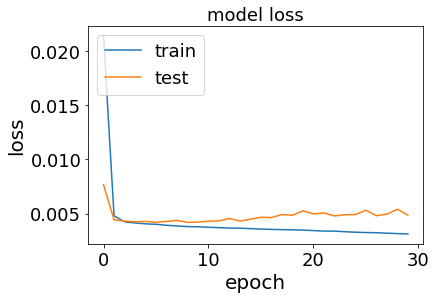

In [378]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

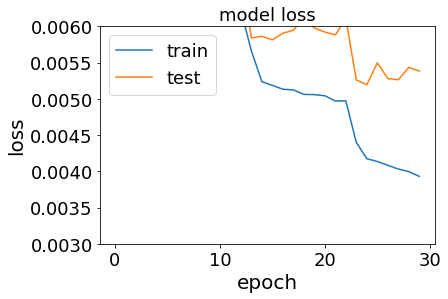

In [346]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.003,0.006)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [122]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 168, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 164, 64)      384         input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 164, 64)      4160        conv1d_9[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 82, 64)       0           conv1d_10[0][0]                  
____________________________________________________________________________________________

In [379]:
model.load_weights("saved_weights/pm2.5_1dcnn_multi_exp_add1.hdf5")

In [70]:
len(testyy)/24


349.2083333333333

In [207]:
import random
##133,106,130,143,111,172

    #print(i,random.randint(0,37))
j=np.random.choice(174,15,replace=False).tolist()

In [211]:
j

[23, 34, 49, 83, 146, 4, 14, 77, 80, 159, 165, 43, 13, 6, 57]

In [349]:
len(valY)/24

174.58333333333334

In [380]:
from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)


print(np.mean(non_aug_rm))
print(np.mean(non_aug_ma))

Test MAE: 0.03685
Test RMSE: 0.04228
Test MAE: 0.01562
Test RMSE: 0.01935
Test MAE: 0.02203
Test RMSE: 0.02550
Test MAE: 0.01268
Test RMSE: 0.01735
Test MAE: 0.04028
Test RMSE: 0.04405
Test MAE: 0.01044
Test RMSE: 0.01432
Test MAE: 0.00755
Test RMSE: 0.00978
Test MAE: 0.02240
Test RMSE: 0.02972
Test MAE: 0.01572
Test RMSE: 0.01959
Test MAE: 0.04556
Test RMSE: 0.05092
Test MAE: 0.00984
Test RMSE: 0.01391
Test MAE: 0.04984
Test RMSE: 0.06681
Test MAE: 0.01098
Test RMSE: 0.01430
Test MAE: 0.01025
Test RMSE: 0.01318
Test MAE: 0.02895
Test RMSE: 0.03227
0.027555023066539768
0.022600269


In [393]:
from math import *
from sklearn.metrics import *

aug_rm=[]
aug_ma=[]

for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k+15]
    testy=testY[24*k+15]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)

    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)
    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.01626
Test RMSE: 0.02044
Test MAE: 0.01479
Test RMSE: 0.01729
Test MAE: 0.01762
Test RMSE: 0.02018
Test MAE: 0.01090
Test RMSE: 0.01314
Test MAE: 0.08185
Test RMSE: 0.08944
Test MAE: 0.02744
Test RMSE: 0.03088
Test MAE: 0.01874
Test RMSE: 0.02223
Test MAE: 0.03705
Test RMSE: 0.04461
Test MAE: 0.01755
Test RMSE: 0.02105
Test MAE: 0.01488
Test RMSE: 0.01867
Test MAE: 0.03688
Test RMSE: 0.04186
Test MAE: 0.02227
Test RMSE: 0.02913
Test MAE: 0.00701
Test RMSE: 0.00863
Test MAE: 0.03393
Test RMSE: 0.04054
Test MAE: 0.02343
Test RMSE: 0.03043
0.029901318440179476
0.025372583


In [216]:
print(np.std(non_aug_rm))
print(np.std(non_aug_ma))
print(np.std(aug_rm))
print(np.std(aug_ma))

0.014846255230896506
0.012808043
0.012299779519790556
0.010290639


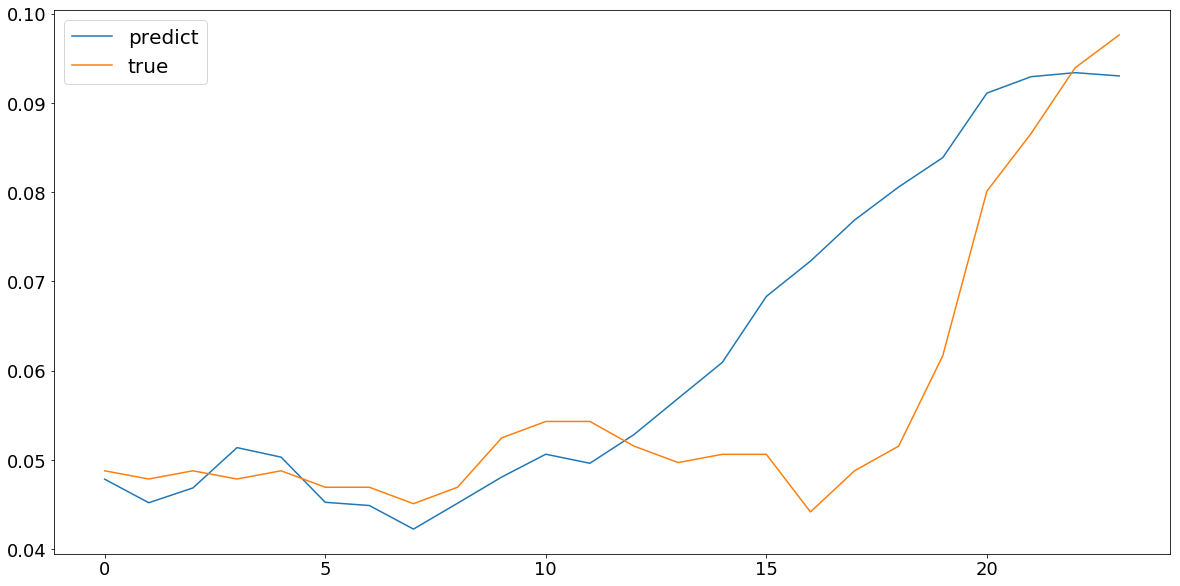

Test RMSE: 0.01235
Test MAE: 0.00825
Test MSE: 0.00015
Test RMSE: 13.41705
Test MAE: 8.95641


In [577]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*mon[-7]+15]
testy=testY[24*mon[-7]+15]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))-abs(np.min(values))
testY_inverse=testy*(np.max(values)-np.min(values))-abs(np.min(values))
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


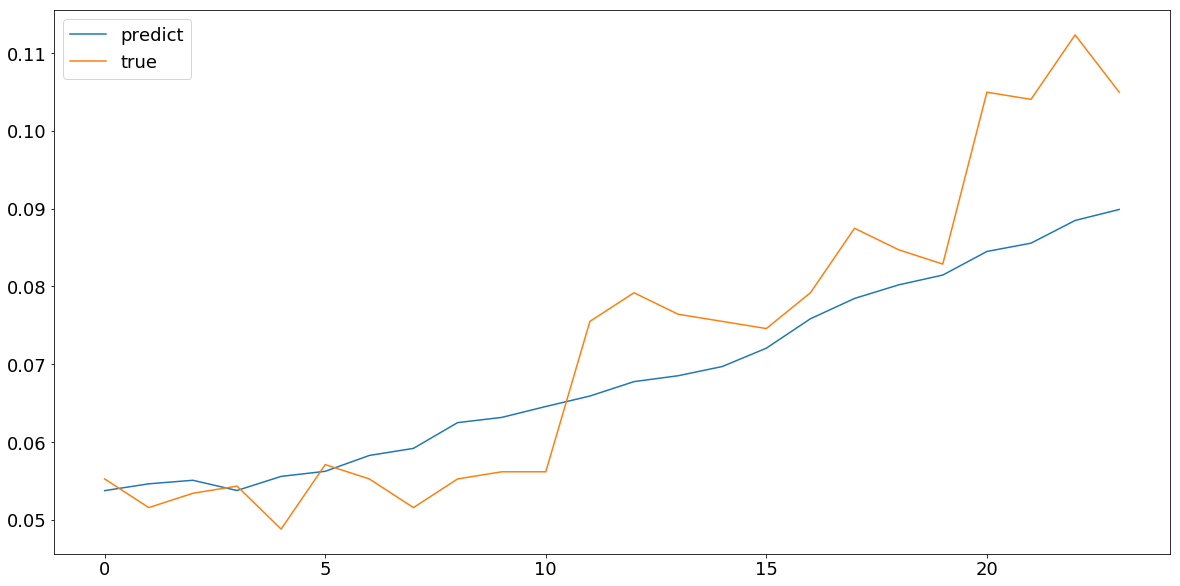

Test RMSE: 0.00978
Test MAE: 0.00755
Test MSE: 0.00010
Test RMSE: 10.62644
Test MAE: 8.19631


In [385]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*14]
testy=testY[24*14]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))-abs(np.min(values))
testY_inverse=testy*(np.max(values)-np.min(values))-abs(np.min(values))
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


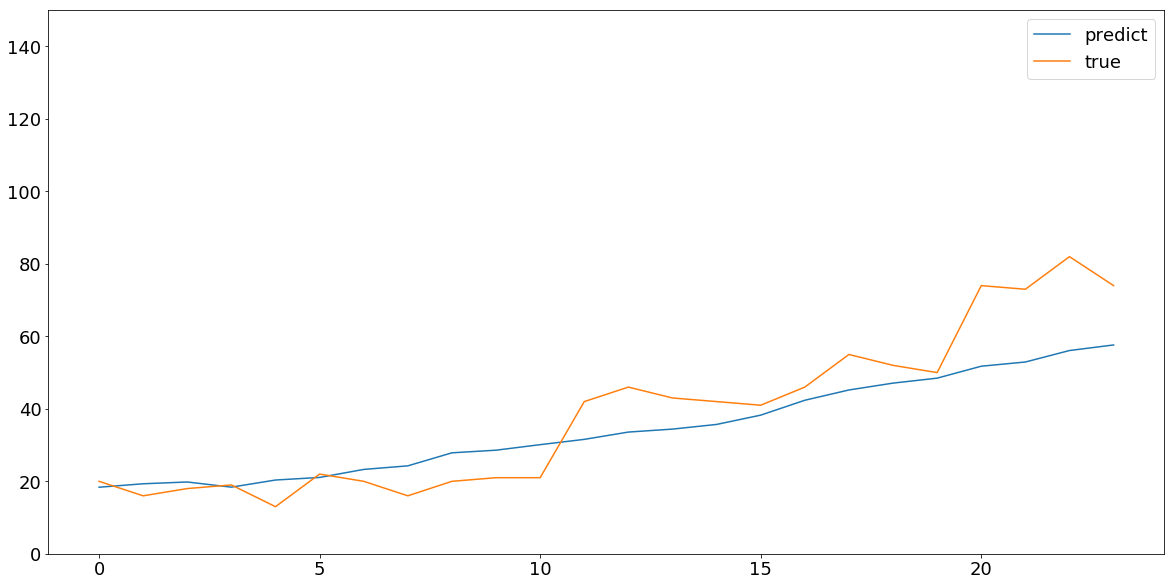

In [387]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
plt.ylim(0,150)
pyplot.show()

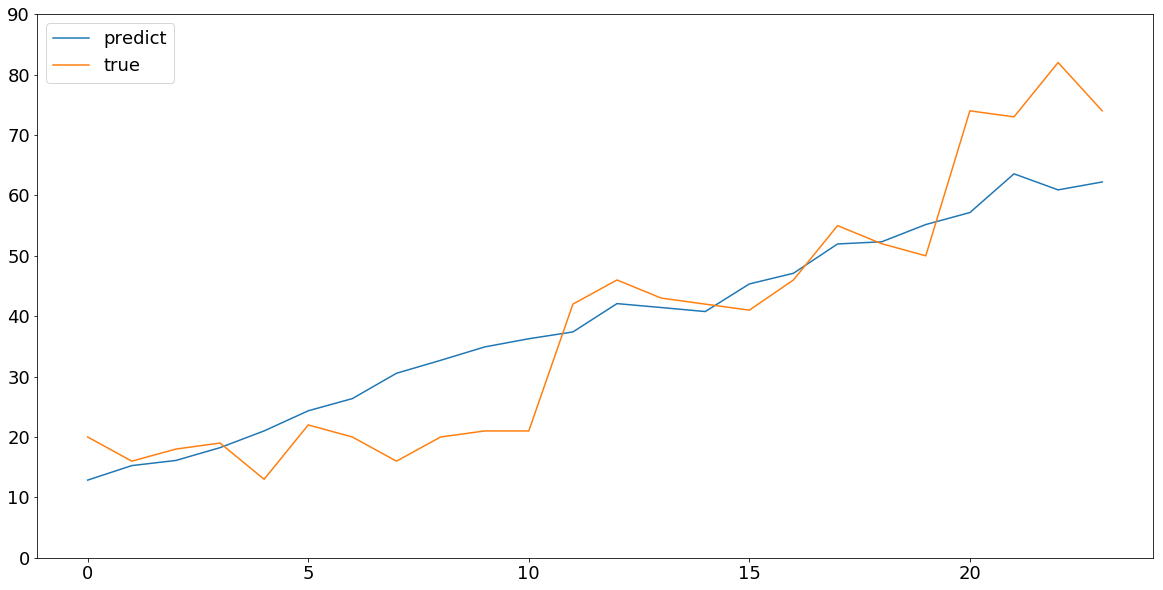

In [375]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
plt.ylim(0,90)
pyplot.show()

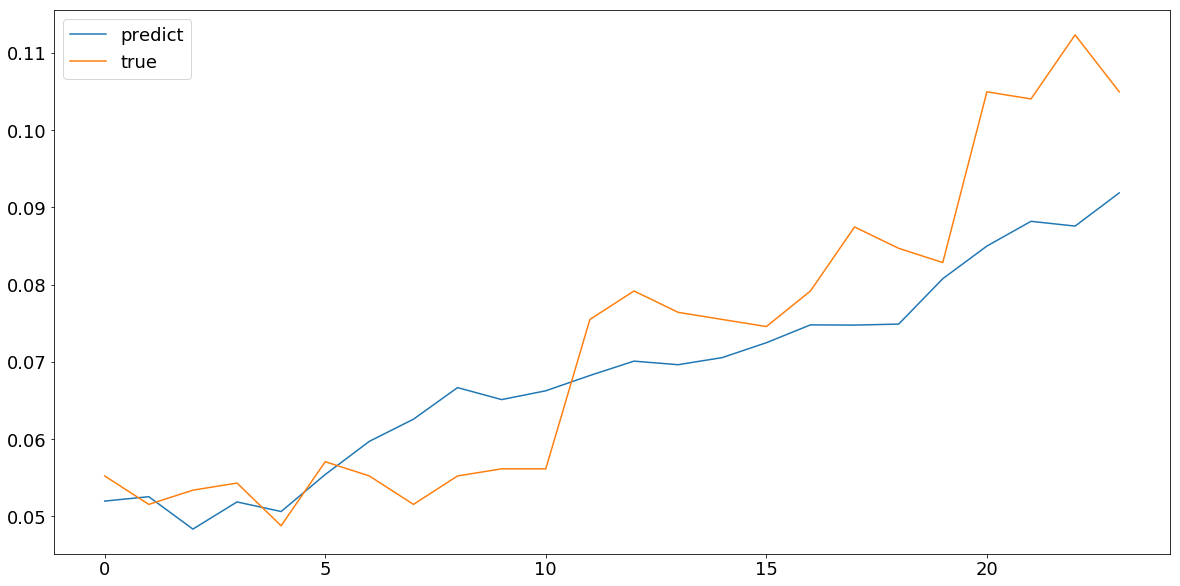

Test RMSE: 0.01006
Test MAE: 0.00808
Test MSE: 0.00010
Test RMSE: 10.92366
Test MAE: 8.77912


In [280]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*14]
testy=testY[24*14]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))-abs(np.min(values))
testY_inverse=testy*(np.max(values)-np.min(values))-abs(np.min(values))
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


In [34]:
len(testX)/24

175.0

In [44]:

wed=[]

for i in range(len(testX)):
    if i*7+6<174:
        wed.append(i*7+6)

In [40]:
sat

[2,
 9,
 16,
 23,
 30,
 37,
 44,
 51,
 58,
 65,
 72,
 79,
 86,
 93,
 100,
 107,
 114,
 121,
 128,
 135,
 142,
 149,
 156,
 163,
 170]

In [50]:
from math import *
from sklearn.metrics import *

In [51]:
aug_rm=[]
aug_ma=[]
for k in sun:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.03888
Test RMSE: 0.04100
Test MAE: 0.03053
Test RMSE: 0.03346
Test MAE: 0.02645
Test RMSE: 0.03185
Test MAE: 0.01827
Test RMSE: 0.02467
Test MAE: 0.03079
Test RMSE: 0.03647
Test MAE: 0.01678
Test RMSE: 0.01997
Test MAE: 0.02214
Test RMSE: 0.02581
Test MAE: 0.04046
Test RMSE: 0.04759
Test MAE: 0.01162
Test RMSE: 0.01313
Test MAE: 0.01580
Test RMSE: 0.01818
Test MAE: 0.01646
Test RMSE: 0.02386
Test MAE: 0.08409
Test RMSE: 0.08997
Test MAE: 0.05010
Test RMSE: 0.05488
Test MAE: 0.05444
Test RMSE: 0.07853
Test MAE: 0.05980
Test RMSE: 0.07461
Test MAE: 0.11882
Test RMSE: 0.14375
Test MAE: 0.09632
Test RMSE: 0.10637
Test MAE: 0.00609
Test RMSE: 0.00737
Test MAE: 0.07425
Test RMSE: 0.08771
Test MAE: 0.03705
Test RMSE: 0.04230
Test MAE: 0.10784
Test RMSE: 0.12290
Test MAE: 0.04420
Test RMSE: 0.04953
Test MAE: 0.01092
Test RMSE: 0.01275
Test MAE: 0.03357
Test RMSE: 0.03808
Test MAE: 0.05871
Test RMSE: 0.08096
0.05222860925264227
0.044175386


In [52]:
aug_rm=[]
aug_ma=[]
for k in mon:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.02199
Test RMSE: 0.02389
Test MAE: 0.01803
Test RMSE: 0.02157
Test MAE: 0.01225
Test RMSE: 0.01616
Test MAE: 0.03743
Test RMSE: 0.04123
Test MAE: 0.02828
Test RMSE: 0.03034
Test MAE: 0.06115
Test RMSE: 0.06417
Test MAE: 0.03717
Test RMSE: 0.04073
Test MAE: 0.02253
Test RMSE: 0.02578
Test MAE: 0.02116
Test RMSE: 0.03030
Test MAE: 0.04005
Test RMSE: 0.04943
Test MAE: 0.06649
Test RMSE: 0.07308
Test MAE: 0.01907
Test RMSE: 0.02288
Test MAE: 0.04694
Test RMSE: 0.05729
Test MAE: 0.02943
Test RMSE: 0.03528
Test MAE: 0.05622
Test RMSE: 0.07167
Test MAE: 0.14603
Test RMSE: 0.16379
Test MAE: 0.02949
Test RMSE: 0.03149
Test MAE: 0.04382
Test RMSE: 0.05007
Test MAE: 0.10151
Test RMSE: 0.11930
Test MAE: 0.01776
Test RMSE: 0.02163
Test MAE: 0.09856
Test RMSE: 0.11631
Test MAE: 0.04745
Test RMSE: 0.06108
Test MAE: 0.03628
Test RMSE: 0.04477
Test MAE: 0.01580
Test RMSE: 0.01801
Test MAE: 0.07453
Test RMSE: 0.08732
0.05270303646405015
0.045176864


In [53]:
aug_rm=[]
aug_ma=[]
for k in tue:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.02625
Test RMSE: 0.02987
Test MAE: 0.04214
Test RMSE: 0.04890
Test MAE: 0.01589
Test RMSE: 0.01777
Test MAE: 0.04829
Test RMSE: 0.05933
Test MAE: 0.05952
Test RMSE: 0.06385
Test MAE: 0.02565
Test RMSE: 0.02991
Test MAE: 0.04335
Test RMSE: 0.04744
Test MAE: 0.02777
Test RMSE: 0.03619
Test MAE: 0.11316
Test RMSE: 0.11760
Test MAE: 0.04287
Test RMSE: 0.04684
Test MAE: 0.02643
Test RMSE: 0.03146
Test MAE: 0.04068
Test RMSE: 0.05191
Test MAE: 0.02512
Test RMSE: 0.02798
Test MAE: 0.03154
Test RMSE: 0.03404
Test MAE: 0.05462
Test RMSE: 0.06875
Test MAE: 0.02062
Test RMSE: 0.02279
Test MAE: 0.02044
Test RMSE: 0.02314
Test MAE: 0.03094
Test RMSE: 0.03653
Test MAE: 0.02195
Test RMSE: 0.02336
Test MAE: 0.08860
Test RMSE: 0.09763
Test MAE: 0.03196
Test RMSE: 0.03945
Test MAE: 0.04050
Test RMSE: 0.05172
Test MAE: 0.10490
Test RMSE: 0.10946
Test MAE: 0.02687
Test RMSE: 0.03320
Test MAE: 0.07737
Test RMSE: 0.08577
0.04939515303605369
0.043496884


In [54]:
aug_rm=[]
aug_ma=[]
for k in wed:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.00833
Test RMSE: 0.00957
Test MAE: 0.02672
Test RMSE: 0.02844
Test MAE: 0.01570
Test RMSE: 0.02392
Test MAE: 0.02184
Test RMSE: 0.02356
Test MAE: 0.03630
Test RMSE: 0.03951
Test MAE: 0.02075
Test RMSE: 0.02539
Test MAE: 0.03063
Test RMSE: 0.03582
Test MAE: 0.03509
Test RMSE: 0.04158
Test MAE: 0.01429
Test RMSE: 0.01737
Test MAE: 0.01823
Test RMSE: 0.02171
Test MAE: 0.05540
Test RMSE: 0.06247
Test MAE: 0.02789
Test RMSE: 0.02997
Test MAE: 0.05021
Test RMSE: 0.06801
Test MAE: 0.02951
Test RMSE: 0.03298
Test MAE: 0.04514
Test RMSE: 0.04798
Test MAE: 0.02815
Test RMSE: 0.03353
Test MAE: 0.04361
Test RMSE: 0.05780
Test MAE: 0.08011
Test RMSE: 0.08582
Test MAE: 0.02903
Test RMSE: 0.03233
Test MAE: 0.05939
Test RMSE: 0.07309
Test MAE: 0.02523
Test RMSE: 0.02821
Test MAE: 0.11339
Test RMSE: 0.13937
Test MAE: 0.03192
Test RMSE: 0.03681
Test MAE: 0.02691
Test RMSE: 0.04019
0.04314309629831891
0.036407296


In [55]:
aug_rm=[]
aug_ma=[]
for k in thu:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.04310
Test RMSE: 0.04637
Test MAE: 0.03661
Test RMSE: 0.04332
Test MAE: 0.01945
Test RMSE: 0.02102
Test MAE: 0.04682
Test RMSE: 0.05547
Test MAE: 0.02794
Test RMSE: 0.03530
Test MAE: 0.02611
Test RMSE: 0.03020
Test MAE: 0.01312
Test RMSE: 0.01484
Test MAE: 0.01317
Test RMSE: 0.01724
Test MAE: 0.02818
Test RMSE: 0.03080
Test MAE: 0.02642
Test RMSE: 0.03092
Test MAE: 0.04085
Test RMSE: 0.04474
Test MAE: 0.05223
Test RMSE: 0.05450
Test MAE: 0.01192
Test RMSE: 0.01437
Test MAE: 0.08293
Test RMSE: 0.11418
Test MAE: 0.05781
Test RMSE: 0.06846
Test MAE: 0.01369
Test RMSE: 0.01916
Test MAE: 0.02847
Test RMSE: 0.03598
Test MAE: 0.10071
Test RMSE: 0.11573
Test MAE: 0.02481
Test RMSE: 0.02752
Test MAE: 0.14073
Test RMSE: 0.15960
Test MAE: 0.07759
Test RMSE: 0.10796
Test MAE: 0.07684
Test RMSE: 0.08416
Test MAE: 0.10962
Test RMSE: 0.13239
Test MAE: 0.05132
Test RMSE: 0.06695
Test MAE: 0.04211
Test RMSE: 0.04436
0.056621333875287554
0.047702


In [56]:
aug_rm=[]
aug_ma=[]
for k in fri:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.02674
Test RMSE: 0.02943
Test MAE: 0.03858
Test RMSE: 0.04278
Test MAE: 0.01792
Test RMSE: 0.02263
Test MAE: 0.01535
Test RMSE: 0.02086
Test MAE: 0.02629
Test RMSE: 0.03036
Test MAE: 0.02650
Test RMSE: 0.02840
Test MAE: 0.04242
Test RMSE: 0.04629
Test MAE: 0.01498
Test RMSE: 0.01722
Test MAE: 0.02093
Test RMSE: 0.02532
Test MAE: 0.01337
Test RMSE: 0.01603
Test MAE: 0.02881
Test RMSE: 0.03373
Test MAE: 0.03507
Test RMSE: 0.04258
Test MAE: 0.02772
Test RMSE: 0.03277
Test MAE: 0.11679
Test RMSE: 0.13496
Test MAE: 0.01266
Test RMSE: 0.01410
Test MAE: 0.02126
Test RMSE: 0.02449
Test MAE: 0.01989
Test RMSE: 0.02503
Test MAE: 0.02905
Test RMSE: 0.02970
Test MAE: 0.01913
Test RMSE: 0.02146
Test MAE: 0.06345
Test RMSE: 0.07558
Test MAE: 0.18187
Test RMSE: 0.19922
Test MAE: 0.02641
Test RMSE: 0.03182
Test MAE: 0.01871
Test RMSE: 0.02462
Test MAE: 0.03623
Test RMSE: 0.04742
Test MAE: 0.01404
Test RMSE: 0.01597
0.041310948159794816
0.035767168


In [466]:

yhat = model.predict([testX])
yhat.shape

(4191, 24)

In [467]:
testX.shape

(4191, 168, 8)

In [430]:
aug_rm=[]
aug_ma=[]
for k in sat:

    yhat = model.predict([testX])
    yhat=yhat[24*k+15]
    testy=testY[24*k+15]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.03346
Test RMSE: 0.03506
Test MAE: 0.02694
Test RMSE: 0.03039
Test MAE: 0.02675
Test RMSE: 0.03244
Test MAE: 0.01626
Test RMSE: 0.02044
Test MAE: 0.03056
Test RMSE: 0.03678
Test MAE: 0.01419
Test RMSE: 0.01784
Test MAE: 0.02745
Test RMSE: 0.03209
Test MAE: 0.03908
Test RMSE: 0.04455
Test MAE: 0.00934
Test RMSE: 0.01118
Test MAE: 0.01622
Test RMSE: 0.01968
Test MAE: 0.01750
Test RMSE: 0.02544
Test MAE: 0.08123
Test RMSE: 0.08654
Test MAE: 0.04419
Test RMSE: 0.05085
Test MAE: 0.05464
Test RMSE: 0.07539
Test MAE: 0.05961
Test RMSE: 0.07382
Test MAE: 0.11827
Test RMSE: 0.14182
Test MAE: 0.09415
Test RMSE: 0.10438
Test MAE: 0.01346
Test RMSE: 0.01591
Test MAE: 0.06993
Test RMSE: 0.08271
Test MAE: 0.01997
Test RMSE: 0.02579
Test MAE: 0.11760
Test RMSE: 0.13405
Test MAE: 0.04753
Test RMSE: 0.05489
Test MAE: 0.00989
Test RMSE: 0.01225
Test MAE: 0.02194
Test RMSE: 0.02667
Test MAE: 0.06231
Test RMSE: 0.08480
0.0510300048846959
0.04289758


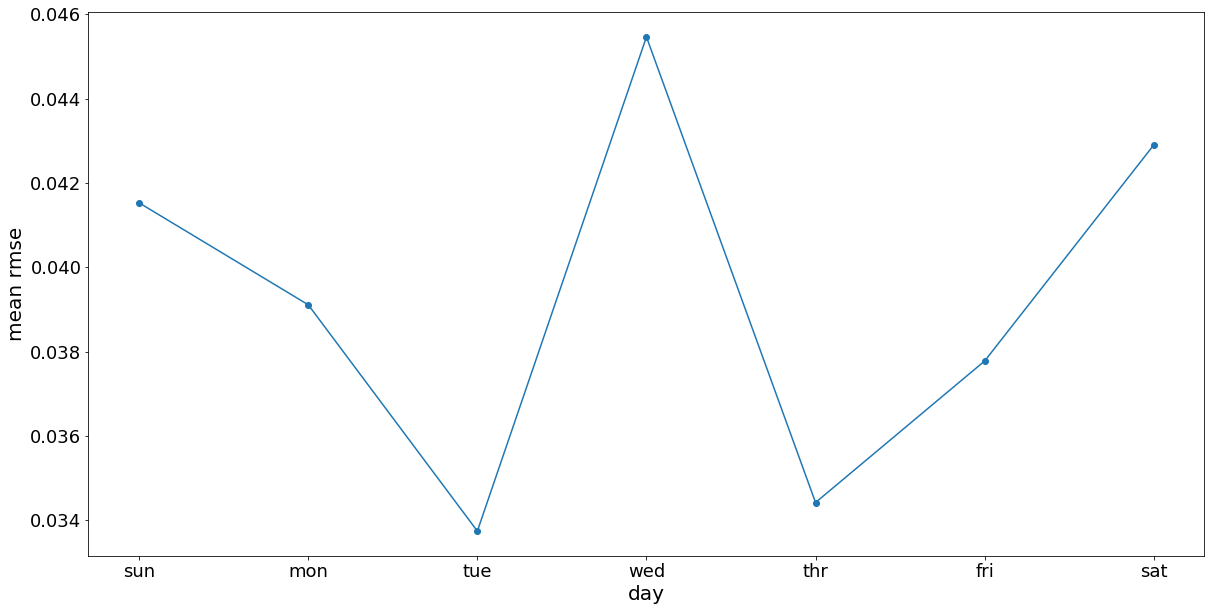

In [431]:
plt.figure(figsize=(20,10))

days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']

scores=[0.041525412,0.039108604,0.033743132, 0.045460686,0.034420695,0.03777577,0.04289758]
pyplot.plot(days, scores, marker='o', label='reslstm-cnn')
plt.ylabel('mean rmse')
plt.xlabel('day')
pyplot.show()

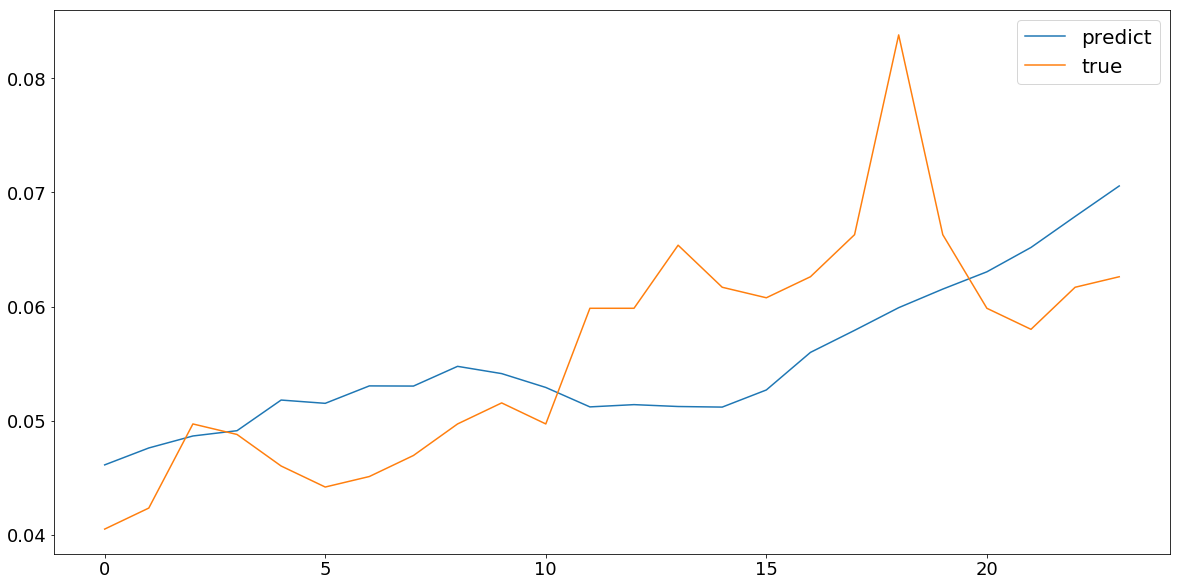

Test RMSE: 0.00837
Test MAE: 0.00701
Test MSE: 0.00007
Test RMSE: 9.08940
Test MAE: 7.60826


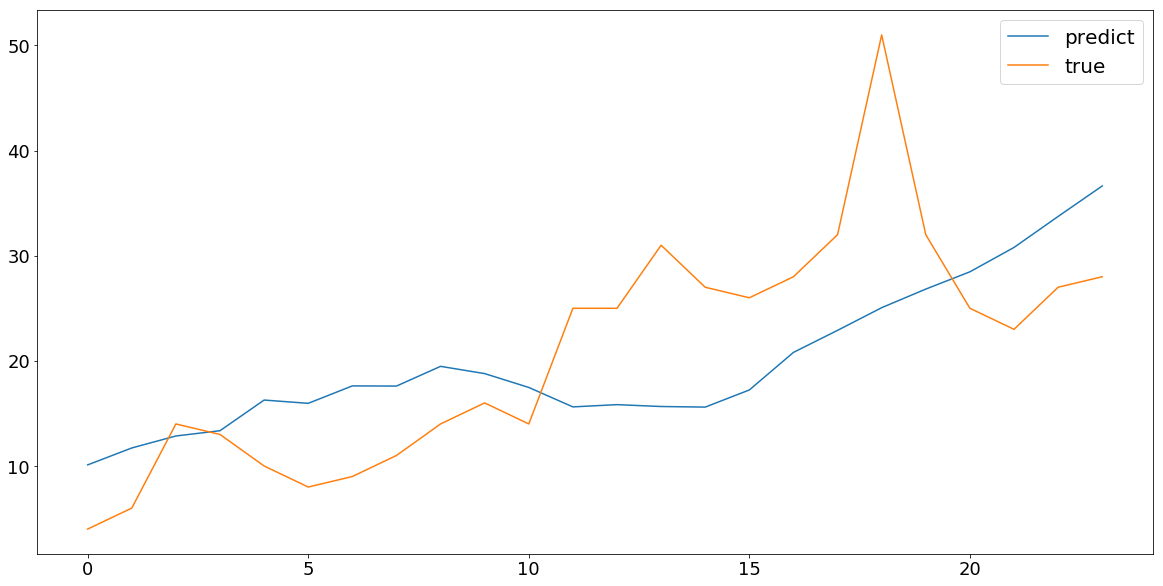

In [450]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*tue[3]+15]
testy=testY[24*tue[3]+15]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
pyplot.show()


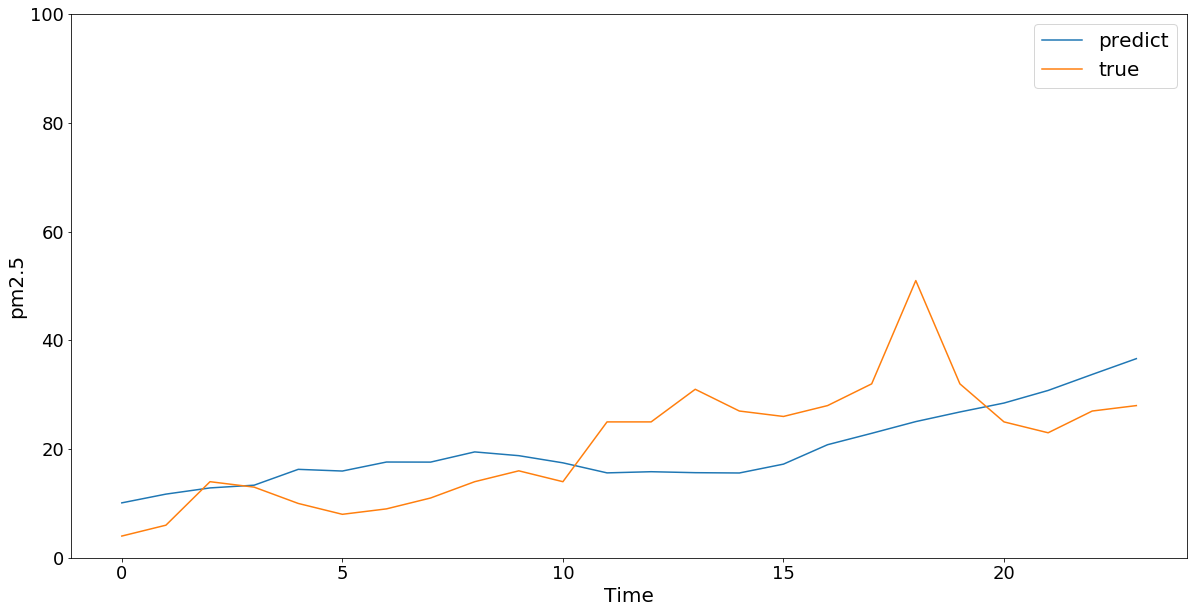

In [452]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
plt.ylim(0,100)
plt.xlabel('Time')
plt.ylabel('pm2.5')
pyplot.show()

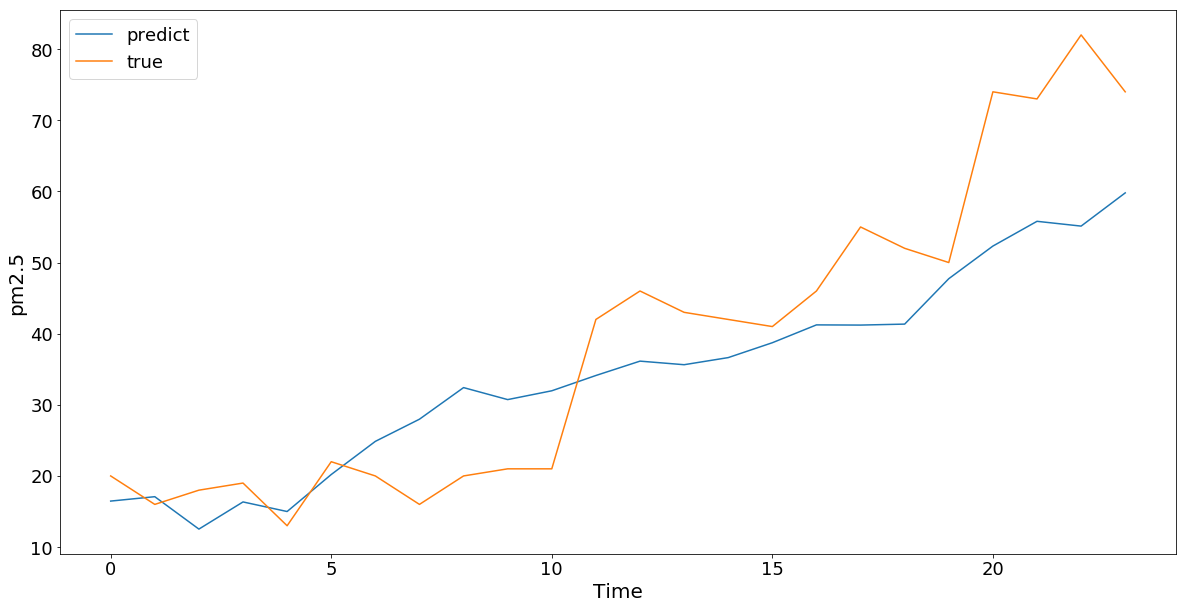

In [281]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

plt.xlabel('Time')
plt.ylabel('pm2.5')
pyplot.show()

In [ ]:
wed[1], mon[14]
thu[-5]

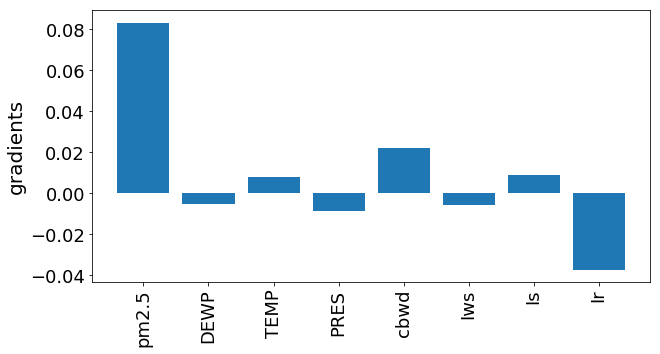

In [453]:

columns=data.columns[5:]
X_test=testX.copy()
id_=24*tue[3]+15
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

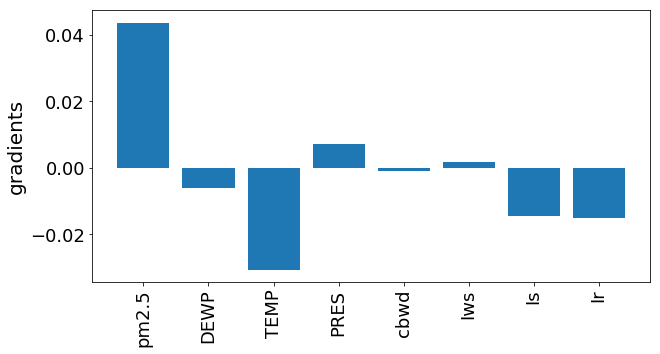

In [457]:

columns=data.columns[5:]
X_test=testX.copy()
id_=24*thu[-5]+15
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [458]:
testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([393., 380., 330., 324., 334., 334., 368., 360., 324., 299., 305.,
       290., 314., 315., 306., 292., 315., 332., 342., 338., 375., 375.,
       375., 375., 375., 375., 375., 375., 375., 375., 375., 375., 375.,
       287., 177., 133.,  93.,  82.,  86.,  88.,  33.,  16.,  19.,  22.,
        31.,  37.,  38.,  30.,  17.,   9.,   9.,  12.,   8.,  10.,  13.,
        15.,  29.,  31.,  37.,  36.,  31.,  26.,  28.,  26.,  38.,  48.,
        65.,  79., 101., 123., 146., 127., 107., 106., 116., 100.,  91.,
        91.,  99., 110., 111., 113., 101., 101., 111., 114., 119., 141.,
       149., 134., 143., 174., 182., 181., 186., 193., 240., 289., 282.,
       188., 175., 150., 116., 100.,  42.,  41.,  30.,  28.,  19.,  22.,
        22.,  22.,  31.,  31.,  44.,  46.,  62.,  80., 129., 118.,  90.,
        78.,  86., 111., 144., 121., 112., 111., 146., 159., 151., 143.,
       157., 174., 199., 192., 189., 159., 205., 230., 280., 266., 311.,
       342., 323., 299., 283., 258., 239., 236., 24

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


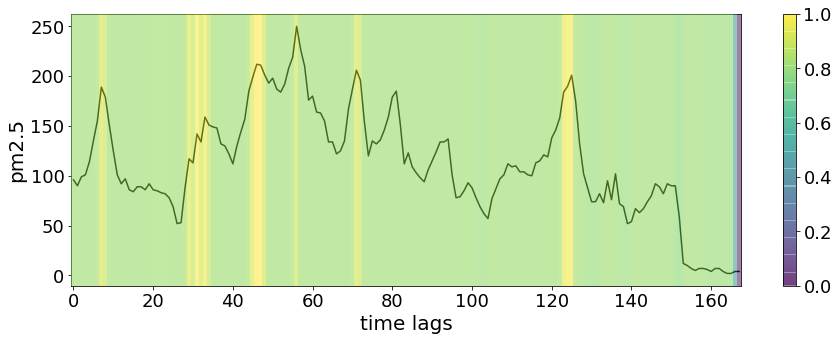

In [456]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('pm2.5'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

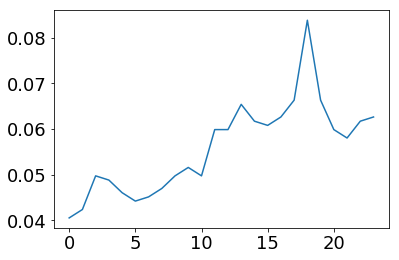

In [460]:
plt.plot(testY[24*tue[3]+15])

[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


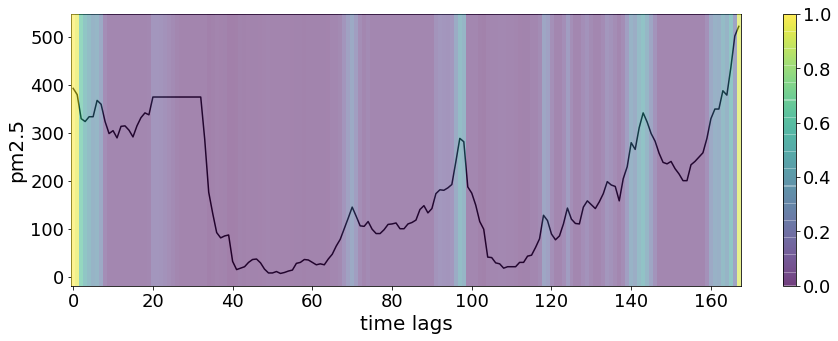

In [459]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('pm2.5'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

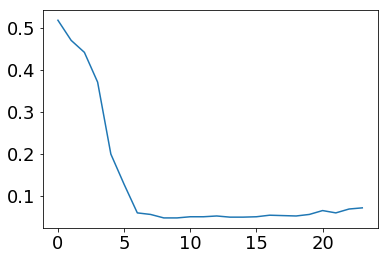

In [461]:
plt.plot(testY[24*thu[-5]+15])

In [250]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('max_pooling1d_4').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

In [251]:
from scipy.ndimage import zoom
import random
id_=random.randint(0,len(testX))


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)

plt.figure(figsize=(9,5))
plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('std series'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*30), alpha=0.35)
plt.axis('off'); plt.colorbar()
np.set_printoptions(False)

ValueError: No such layer: max_pooling1d_4

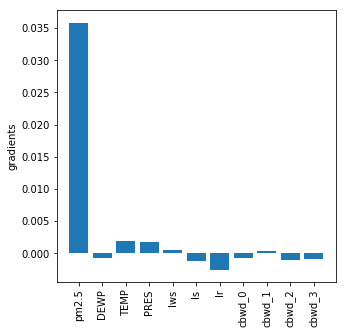

In [106]:
columns=data.columns[5:]

grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(5,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)